## **Análisis y Predicción de Precios de Autos (Core)**

### **Objetivo:**
Aplicar técnicas de regresión lineal, KNN y árboles de decisión para predecir precios de autos utilizando un dataset de Kaggle.

Realizar un Análisis Exploratorio de Datos (EDA) completo y comparar el rendimiento de los modelos mediante benchmarking.


### **Descripción del Dataset:**
Este conjunto de datos contiene información detallada sobre diferentes modelos de autos, incluyendo características técnicas y precios.

El objetivo es predecir el precio de los autos basándose en sus características.

### **Instrucciones:**

### **Parte 1:** Análisis Exploratorio de Datos

1. ***Carga y Exploración de Datos:***

    - Cargar el dataset y revisar la estructura básica.

    - Descripción de las variables y su distribución.

    - Detección y tratamiento de valores nulos.

    - Identificación y tratamiento de outliers.

    - Análisis de correlación entre variables.

### **Parte 2:** Preparación de Datos

2. ***Preprocesamiento:***

    - Selección de características importantes.

    - Transformación de variables categóricas.

    - División del conjunto de datos en entrenamiento y prueba.

    - Escalado de características.

### **Parte 3:** Modelos de Regresión


3. ***Regresión Lineal:***

    - Entrenamiento del modelo.

    - Evaluación del rendimiento (MSE y R²).



4. ***K-Nearest Neighbors (KNN):***

    - Entrenamiento del modelo.

    - Evaluación del rendimiento (MSE y R²).


5. ***Árbol de Decisión:***

    - Entrenamiento del modelo.

    - Evaluación del rendimiento (MSE y R²).


### **Parte 4:** Benchmarking y Comparación de Modelos

6. ***Comparación de Modelos:***

    - Comparar los resultados de los tres modelos en términos de MSE y R².

    - Discusión sobre las diferencias en el rendimiento de los modelos.

### **Conclusión**

7. ***Interpretación de Resultados:***

    - Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.

    - Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.
    

---

### **Tareas Adicionales y Desafíos**

8. ***Desafíos Adicionales:***

- *Optimización de Modelos:* Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.

- *Feature Engineering:* Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.

- *Validación Cruzada:* Implementar validación cruzada para evaluar la estabilidad de los modelos.


**Carga y EDA**

Primeras 10 filas del DataFrame:

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   
5          2                 ?         audi       gas        std          two   
6          1               158         audi       gas        std         four   
7          1                 ?         audi       gas        std         four   
8          1               158         audi       gas      turbo         four   
9          0                 ?         audi       gas      turbo          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size 

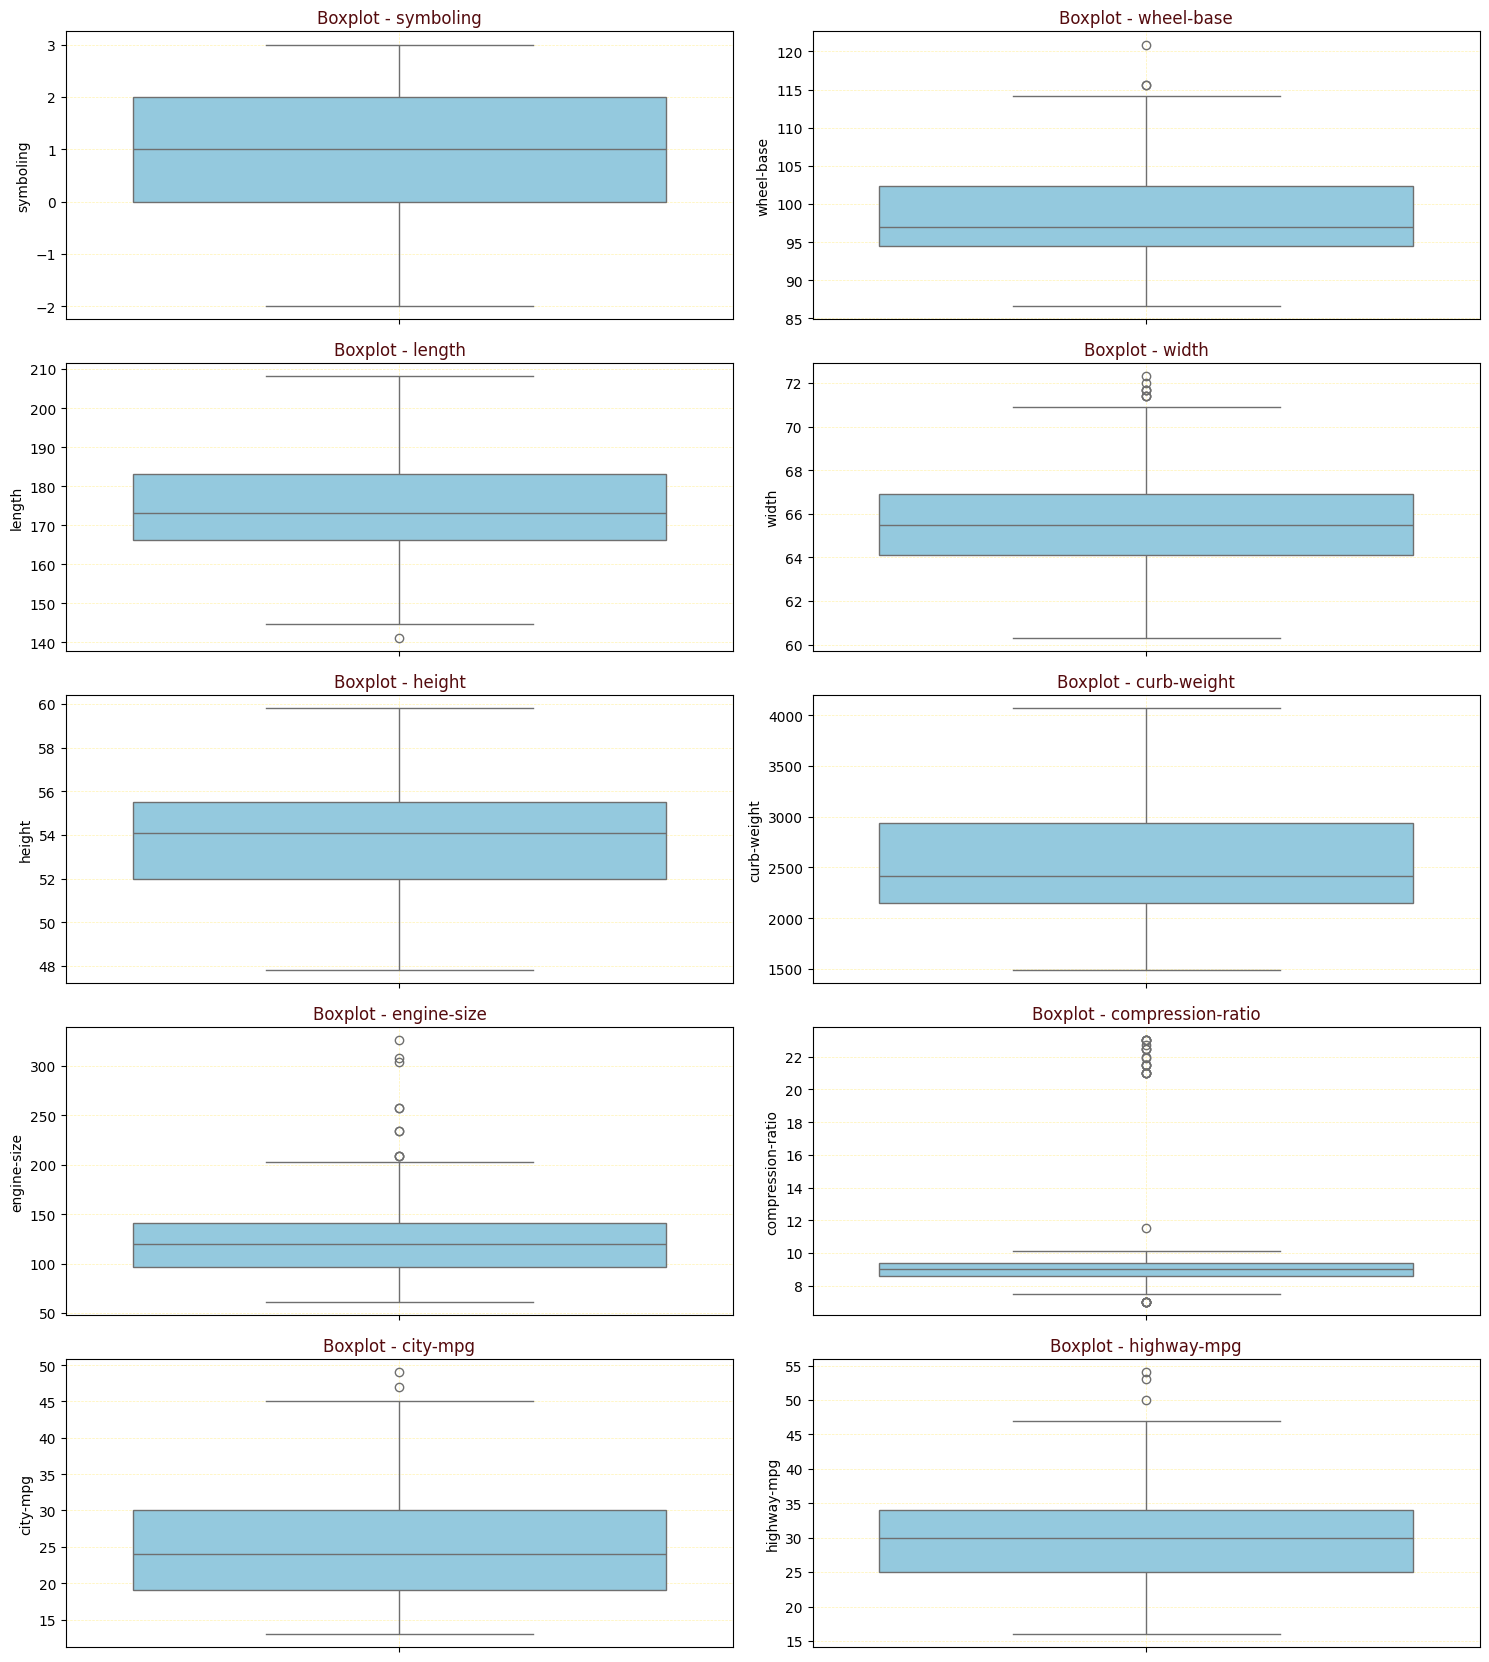


Matriz de correlación entre variables numéricas:

                   symboling  wheel-base    length     width    height  \
symboling           1.000000   -0.531954 -0.357612 -0.232919 -0.541038   
wheel-base         -0.531954    1.000000  0.874587  0.795144  0.589435   
length             -0.357612    0.874587  1.000000  0.841118  0.491029   
width              -0.232919    0.795144  0.841118  1.000000  0.279210   
height             -0.541038    0.589435  0.491029  0.279210  1.000000   
curb-weight        -0.227691    0.776386  0.877728  0.867032  0.295572   
engine-size        -0.105790    0.569329  0.683360  0.735433  0.067149   
compression-ratio  -0.178515    0.249786  0.158414  0.181129  0.261214   
city-mpg           -0.035823   -0.470414 -0.670909 -0.642704 -0.048640   
highway-mpg         0.034606   -0.544082 -0.704662 -0.677218 -0.107358   

                   curb-weight  engine-size  compression-ratio  city-mpg  \
symboling            -0.227691    -0.105790          -0.17

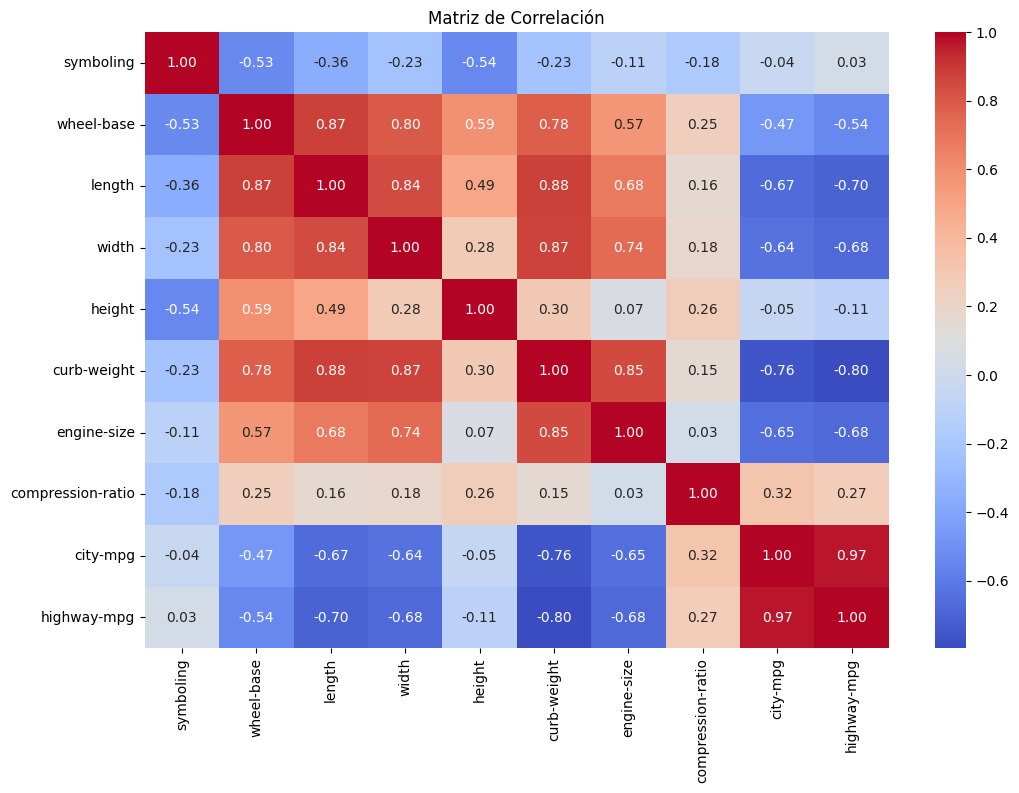

"\n\nInterpretación de la matriz de correlación:\n\n# Una fuerte correlación positiva entre 'engine-size' y 'price' sugiere\nque motores más grandes tienden a estar asociados con precios más altos.\n\n# Variables como 'curb-weight' también tienen una correlación positiva \nsignificativa con 'price', indicando que los autos más pesados suelen ser más costosos.\n\n# Por otro lado, 'city-mpg' y 'highway-mpg' tienen una correlación \nnegativa con 'price', lo que sugiere que los autos más económicos\nen consumo de combustible tienden a ser más baratos.\n\n"

In [ ]:
# Importar pandas y librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = r'C:\Users\Andy\Documents\CodingDojo\Módulo_2_ML\Tareas_ML\Data_Tareas_ML\automobile-data.csv'
auto_data = pd.read_csv(file_path)

# Carga y exploración del dataset

# Mostrar las primeras 10 filas
print("Primeras 10 filas del DataFrame:\n")
print(auto_data.head(10))

# Reemplazar "?" por NaN
auto_data.replace("?", pd.NA, inplace=True)

# Contar valores faltantes por columna
print("\nCantidad de valores faltantes por columna:\n")
print(auto_data.isnull().sum())

# Contar valores únicos por columna
print("\nCantidad de valores únicos por columna:\n")
print(auto_data.nunique())

# Información general del DataFrame
print("\nInformación general del DataFrame:\n")
auto_data.info()

# Descripción de las variables numéricas
print("\nDescripción estadística de las columnas numéricas:\n")
numeric_data = auto_data.select_dtypes(include=["float64", "int64"])
print(numeric_data.describe())

# Tratamiento de valores nulos
auto_data.fillna(auto_data.median(numeric_only=True), inplace=True)

# Imputar valores faltantes en columnas numéricas con la mediana
for col in auto_data.columns:
    if auto_data[col].dtype in ['float64', 'int64']:
        auto_data[col] = auto_data[col].fillna(auto_data[col].median(numeric_only=True))

# Imputar valores faltantes en columnas categóricas con la moda
for col in auto_data.columns:
    if auto_data[col].dtype == 'object':
        auto_data[col] = auto_data[col].fillna(auto_data[col].mode()[0])

''' 
En este caso rellené los valores nulos con la mediana de las columnas numéricas 
ya que la mediana es menos sensible a los outliers y representa mejor 
la tendencia central de los datos, a diferencia de la media, que puede 
verse influenciada por valores extremos. 

Esto garantiza que los datos imputados reflejen de manera adecuada la tendencia central, 
reduciendo su impacto en el análisis y mejorando la precisión de los modelos.

'''

# Identificación y tratamiento de outliers
# Listar las columnas numéricas para graficar boxplots
numeric_columns = numeric_data.columns

# Crear boxplots para cada columna numérica
plt.figure(figsize=(15, 20))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 2 + 1, 2, i)
    sns.boxplot(data=auto_data, y=column, color="#87CEEB")
    plt.title(f"Boxplot - {column}", fontsize=12, color="#540b0e") 
    plt.ylabel(column, fontsize=10)
    plt.grid(color='#fff3b0', linestyle='--', linewidth=0.5)

# Ajustar la distribución de los subgráficos
plt.tight_layout()
plt.show()

''' 

Opté por no eliminar los outliers porque representan datos válidos 
y relevantes para el análisis del mercado de automóviles.

# Precio: Valores altos podrían corresponder a autos de lujo,
valores bajos podrían ser vehículos usados.

# Horsepower: Valores altos representan autos deportivos, 
valores bajos podrían ser autos eléctricos.

# Engine size y Curb weight: Valores altos pueden ser vehículos pesados como camiones o SUV,
valores bajos pueden ser autos compactos o urbanos.

# City / Highway MPG: Valores altos pueden ser autos híbridos o eléctricos,
valores bajos puedn ser autos deportivos o camiones pesados.

'''

# Análisis de correlación entre variables
print("\nMatriz de correlación entre variables numéricas:\n")
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

'''

Interpretación de la matriz de correlación:

# Una fuerte correlación positiva entre 'engine-size' y 'price' sugiere
que motores más grandes tienden a estar asociados con precios más altos.

# Variables como 'curb-weight' también tienen una correlación positiva 
significativa con 'price', indicando que los autos más pesados suelen ser más costosos.

# Por otro lado, 'city-mpg' y 'highway-mpg' tienen una correlación 
negativa con 'price', lo que sugiere que los autos más económicos
en consumo de combustible tienden a ser más baratos.

'''

**Preparación de datos**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Definir los tipos de datos para cada columna
data_types = {
    'symboling': 'int64',
    'normalized-losses': 'float64',
    'make': 'category',
    'fuel-type': 'category',
    'aspiration': 'category',
    'num-of-doors': 'category',
    'body-style': 'category',
    'drive-wheels': 'category',
    'engine-location': 'category',
    'wheel-base': 'float64',
    'length': 'float64',
    'width': 'float64',
    'height': 'float64',
    'curb-weight': 'int64',
    'engine-type': 'category',
    'num-of-cylinders': 'category',
    'engine-size': 'int64',
    'fuel-system': 'category',
    'bore': 'float64',
    'stroke': 'float64',
    'compression-ratio': 'float64',
    'horsepower': 'float64',
    'peak-rpm': 'float64',
    'city-mpg': 'int64',
    'highway-mpg': 'int64',
    'price': 'float64'
}

# Aplicar los tipos de datos al DataFrame
auto_data = auto_data.astype(data_types)

# Corrección de errores
make_corrections = {
    'alfa-romero': 'alfa-romeo',  # Error de escritura
    'Nissan': 'nissan'  # Inconsistencia de mayúsculas
}
auto_data['make'] = auto_data['make'].replace(make_corrections)

# Selección de características importantes
features = ['engine-size', 'horsepower', 'curb-weight', 'city-mpg', 'highway-mpg']
target = 'price'

# Transformación de variables categóricas (One-Hot Encoding)
categorical_features = ['fuel-type', 'aspiration', 'body-style', 'drive-wheels']
auto_data = pd.get_dummies(auto_data, columns=categorical_features, drop_first=True)

# División del conjunto de datos en entrenamiento y prueba
X = auto_data[features]
y = auto_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirmar cambios
print("\nConjunto de datos preprocesado correctamente.\n")
print("Características seleccionadas:\n", features)
print("Ejemplo de datos escalados:\n", X_train_scaled[:5])



Conjunto de datos preprocesado correctamente.

Características seleccionadas:
 ['engine-size', 'horsepower', 'curb-weight', 'city-mpg', 'highway-mpg']
Ejemplo de datos escalados:
 [[ 0.18801047 -0.80526887  0.28128677  0.96431609  1.3135007 ]
 [-0.15899277 -0.23420774  1.01604452 -0.98812636 -1.02456857]
 [-0.85299925 -1.05355633 -0.54164191  0.96431609  1.00175813]
 [-0.72906952 -0.87975511 -1.14708229  0.96431609  1.00175813]
 [-0.40685223 -0.45766644 -0.52400772  0.31350194  0.378273  ]]


### **Modelos de Regresión**

**Regresión Lineal**